<a href="https://www.kaggle.com/code/mdaliraza/german-credit?scriptVersionId=188708498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository

### **Intoduction**

Description of variables:

| **Variable Name** | **Info about Variable** |
| - | - |
| Age | (numeric) |
| Sex | (text: male, female) |
| Job | (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) |
| Housing | (text: own, rent, or free) |
| Saving accounts | (text - little, moderate, quite rich, rich) |
| Checking account | (text - little, moderate, rich) |
| Credit amount | (numeric, in Deutsche Mark) |
| Duration | (numeric, in month) |
| Purpose | (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others |


In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### **Loading the dataset**
**Dimensions of the dataframe**

In [2]:
# loading dataset 
df = pd.read_csv(r'../input/german-credit-data/german_credit_data.csv')

In [3]:
# to check how many rows and columns data has
df.shape 

(1000, 10)

In [4]:
print('Number of observations    : ', df.shape[0]) # number of rows in dataset
print('Number of variables       : ', df.shape[1]) # number of columns in dataset

Number of observations    :  1000
Number of variables       :  10


**Information about the schema**

In [5]:
# to show top observations
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
# to show bottom observations
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [7]:
# here we have an unnamed column as an index we should remove it as pandas already provide us indexing
df = df.drop(columns='Unnamed: 0')

In [8]:
# renaming the columns with extra spaces so dataset can read it properly if it's wrong read
df = df.rename(columns={
    'Saving accounts':'Saving_accounts',
    'Checking account':'Checking_account',
    'Credit amount':'Credit_amount'
})

In [9]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


- we know that there are only three colus are numerical , rest are catagorical.

In [11]:
df = df.astype({"Sex":'category',
                "Job":'category',
                "Housing":'category',
                "Saving_accounts":'category',
                "Checking_account":'category',
                "Purpose":'category'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving_accounts   817 non-null    category
 5   Checking_account  606 non-null    category
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
dtypes: category(6), int64(3)
memory usage: 30.6 KB


| Column Name | Type |
| --- | --- |
| Age | numeric |
| Sex | categorical |
| Job | numeric |
| Housing | categorical |
| Saving accounts | categorical |
| Checking account | categorical |
| Credit amount | numeric |
| Duration | numeric |
| Purpose | categorical |



In [13]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
dtype: int64

**Statistical metrics of each column**

In [14]:
cat_col = df.select_dtypes(include='category').columns

In [15]:
num_col = df.select_dtypes(include='number').columns

In [16]:
# for categorical columns
df.describe(include='category')

,Sex,Job,Housing,Saving_accounts,Checking_account,Purpose
count,1000,1000,1000,817,606,1000
unique,2,4,3,4,3,8
top,male,2,own,little,little,car
freq,690,630,713,603,274,337


In [17]:
# for numerical columns
df.describe(include='number') 

,Age,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [18]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [19]:
df.info()
# here we will see data types of every columns
# also if they have any null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving_accounts   817 non-null    category
 5   Checking_account  606 non-null    category
 6   Credit_amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
dtypes: category(6), int64(3)
memory usage: 30.6 KB


### **Pre-processing steps only as necessary along with the reason behind doing it with suitable steps**


**Missing values**

In [20]:
# to check sum of NaN values in columns
null_values = df.isna()
null_values.sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [21]:
# percentage of null values 
round(null_values.mean() * 100, 2)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving_accounts     18.3
Checking_account    39.4
Credit_amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

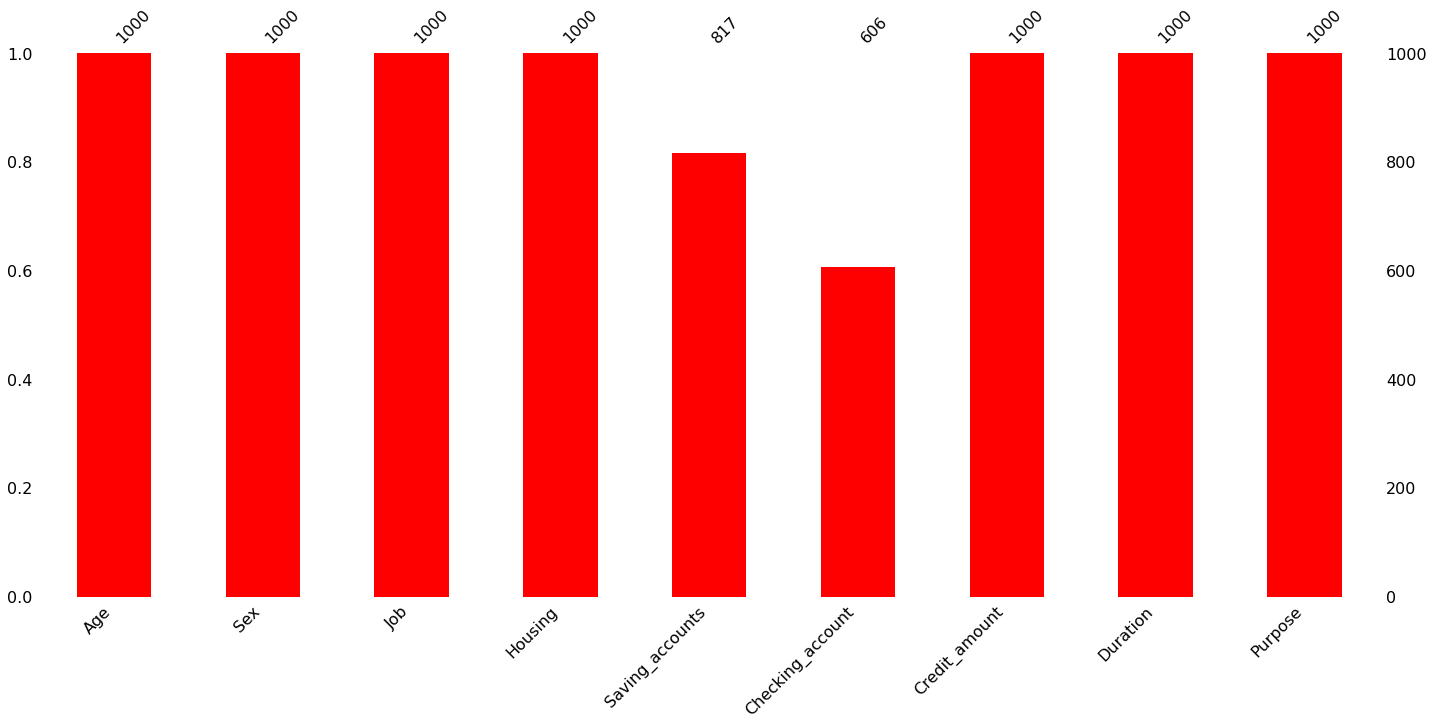

In [22]:
# to visualize missing values in columns
msno.bar(df,color='red')
plt.show()

- as you can see in above bar chart we have missing values in only two of the columns

**Erroneous/wrong values**

In [23]:
# calculating NaN percentage for Saving_ accounts and Checking_accounts columns 
saving_accounts_error = str((df.Saving_accounts.isna().sum() / df.shape[0]) * 100) + ' %'
print('Saving_accounts  - ', saving_accounts_error)
Checking_account_error = str((df.Checking_account.isna().sum() / df.shape[0]) * 100) + ' %'
print('Checking_account - ', Checking_account_error)

Saving_accounts  -  18.3 %
Checking_account -  39.4 %


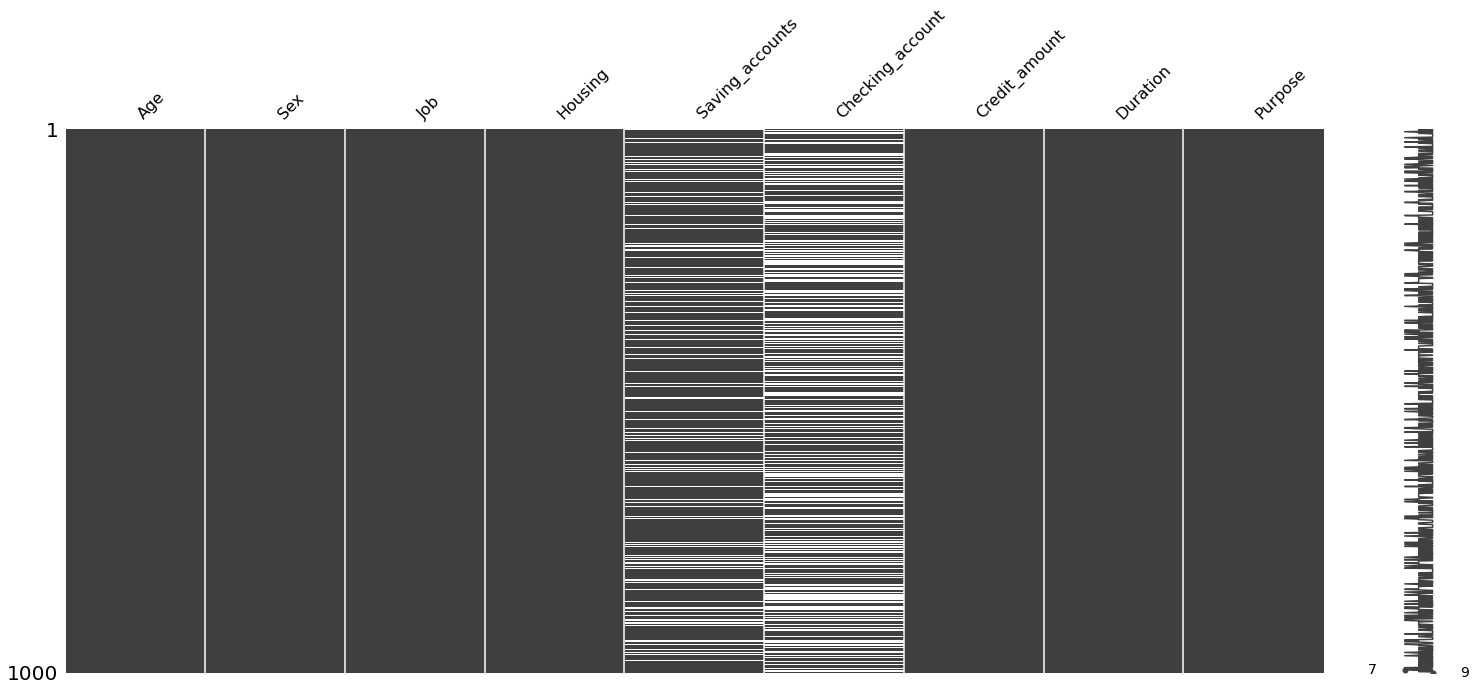

In [24]:
msno.matrix(df)
plt.show()

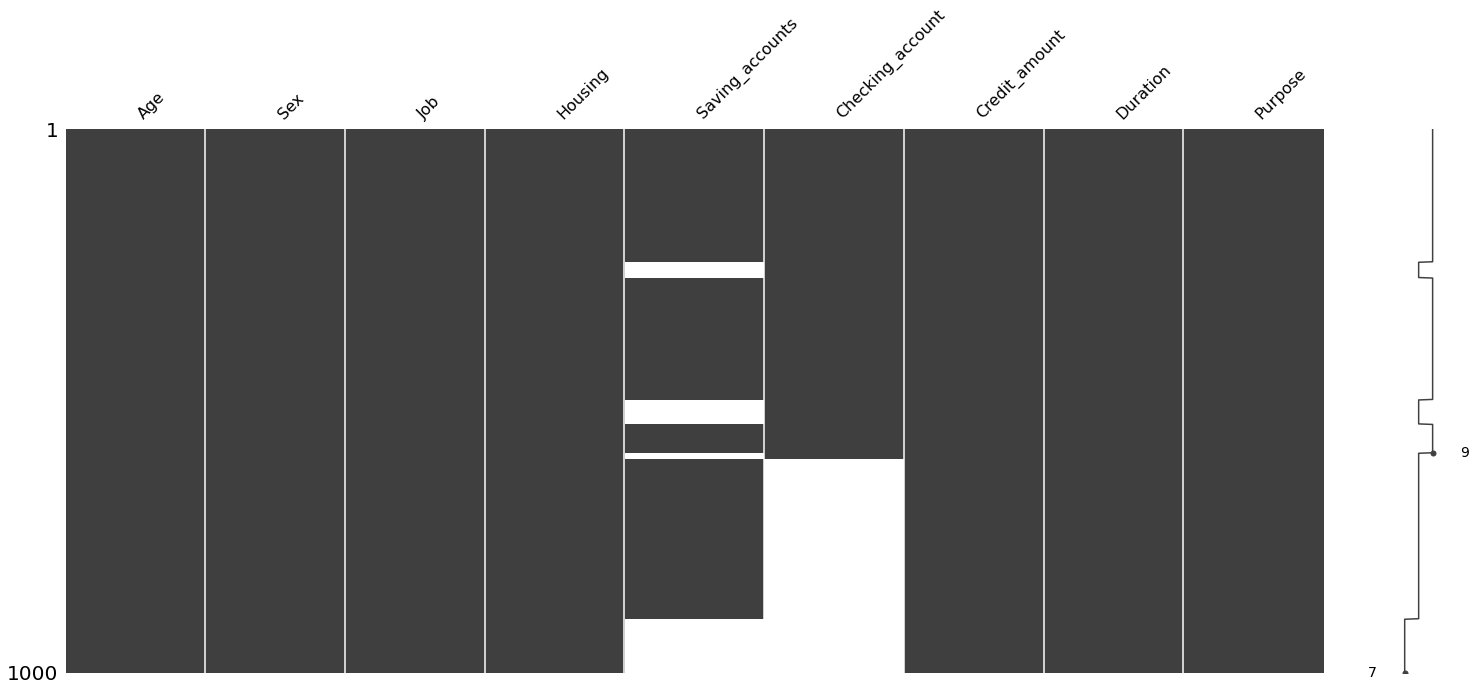

In [25]:
sorted_matrix = df.sort_values(['Checking_account','Saving_accounts'])
msno.matrix(sorted_matrix)
plt.show()

**Skewed data**

In [26]:
round(df[num_col].skew(),2)

Age              1.02
Credit_amount    1.95
Duration         1.09
dtype: float64

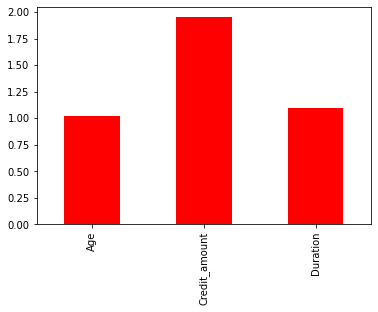

In [27]:
df[num_col].skew().plot(kind='bar',color = 'red')
plt.show()

- Conclusion

| **skew** | **range**| **variable** |
| - | - | - |
| **highly** | <-1 & >1 | Credit_amount |
| **moderate** | (-1 to -0.5) & (o.5 to 1)| Age, Duration |
| **symmetrical** | -0.5 to 0.5 | |

**Outliers**

In [28]:
def outliers_chart(df,*var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.boxplot(data= df, x=i)
        plt.show()
        print()
        q1,q3 = np.percentile(df[i],(25,75))
        IQR = q3 -q1
        up_ws = q3 + 1.5 * IQR
        lw_ws = q1 - 1.5 * IQR
        out_data = df[(df[i]<lw_ws) | (df[i]>up_ws)]
        print(f'Outliers in {i}: ', round(out_data.shape[0]/df.shape[0]*100,2),'%')
        print()

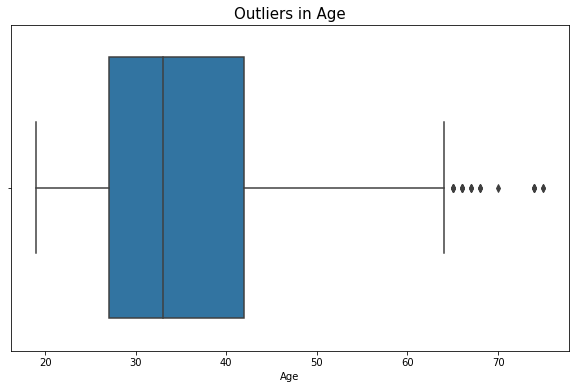


Outliers in Age:  2.3 %



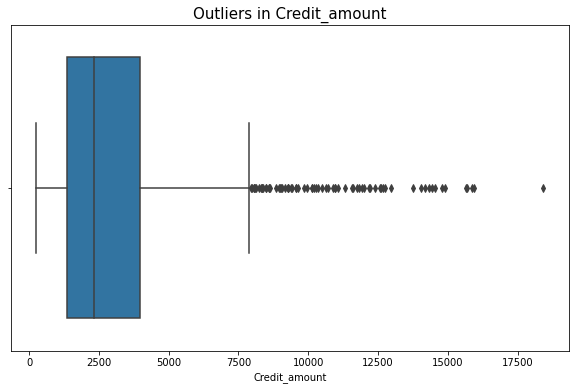


Outliers in Credit_amount:  7.2 %



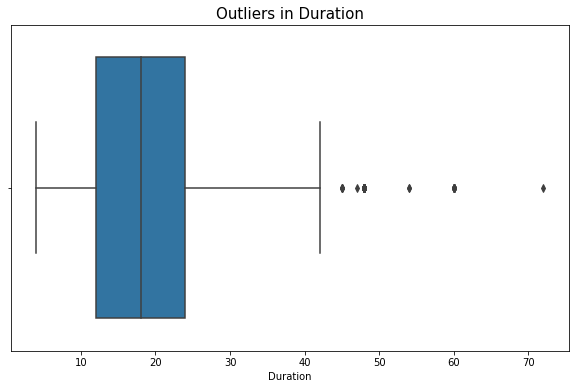


Outliers in Duration:  7.0 %



In [29]:
outliers_chart(df,'Age','Credit_amount', 'Duration')

### **Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots.**

**Distribution of numerical variables**

In [30]:
def num_dis(df,*var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Distribution of {i}', fontsize=15)
        sns.histplot(df,x=i, color='green', kde=True)
        plt.axvline(df[i].mean(), color='r', label='Mean')
        plt.axvline(df[i].median(), color='b',label='Median')
        plt.legend()
        print()

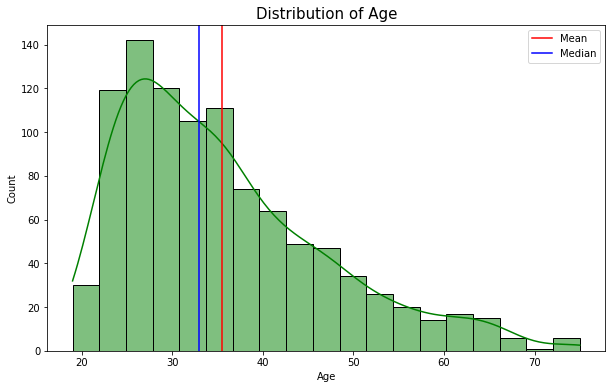

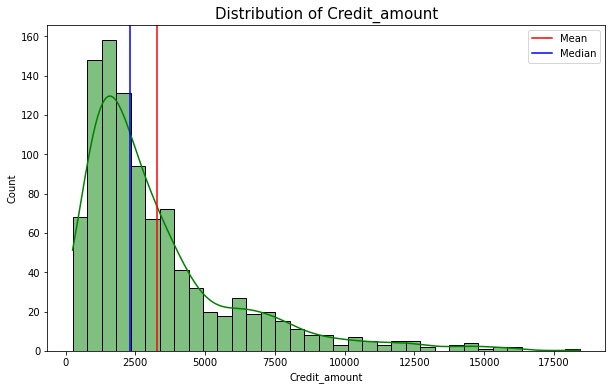

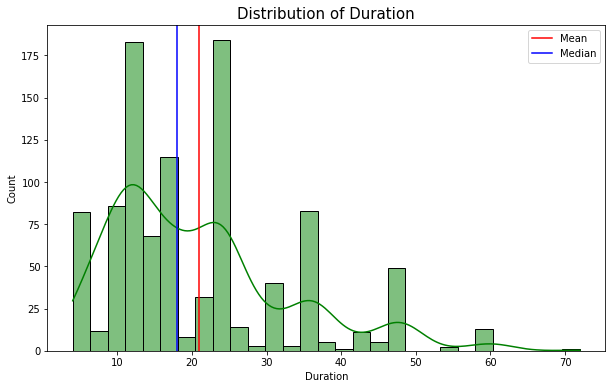

In [31]:
num_dis(df,'Age','Credit_amount', 'Duration')

**Distribution of categorical variables**

In [32]:
def cat_dis(df,*var):
    for i in var:
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,6))
        fig.suptitle(f'Distribution of {i}', fontsize=15)
        # ax[0]
        df[i].value_counts().plot(kind='pie', autopct = '%.2f', shadow = True, ax=ax[0])
        # ax[1]
        sns.countplot(x=df[i], ax=ax[1])
        ax[1].bar_label(ax[1].containers[0])
        plt.xticks(rotation = 30) 

        plt.subplots_adjust(wspace=0.5) # space between two plots
        print()

In [33]:
df['Job'] = df['Job'].map({0:'unskilled & non_resident',
                           1:'unskilled & resident',
                           2:'skilled',
                           3:'highly skilled'})

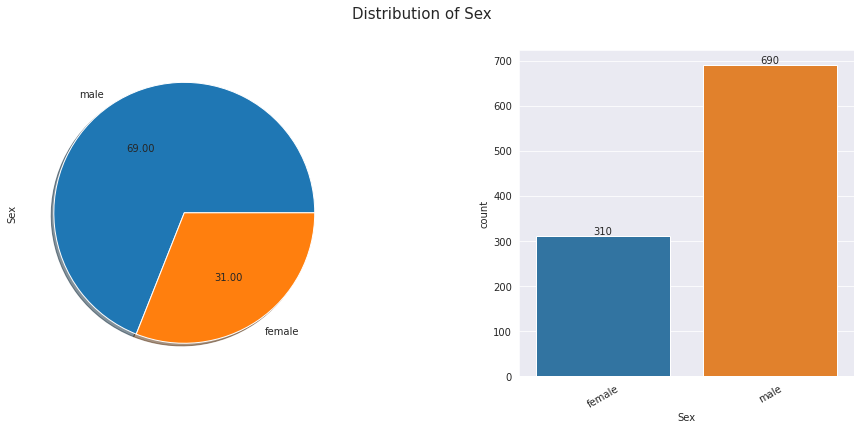

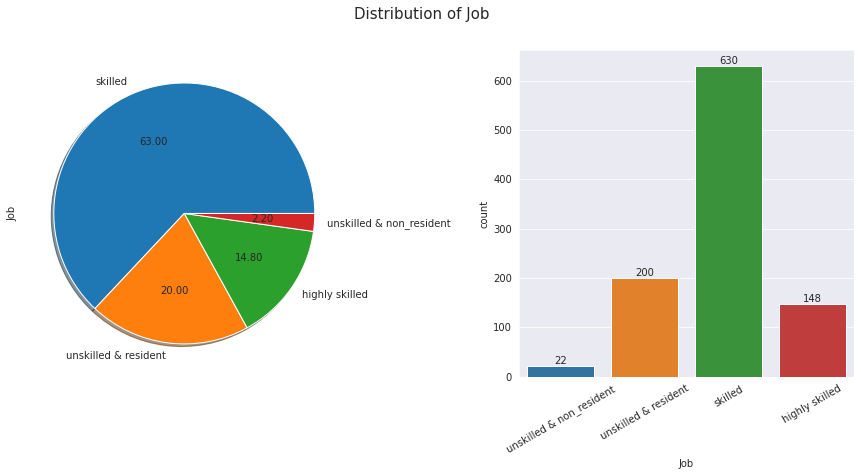

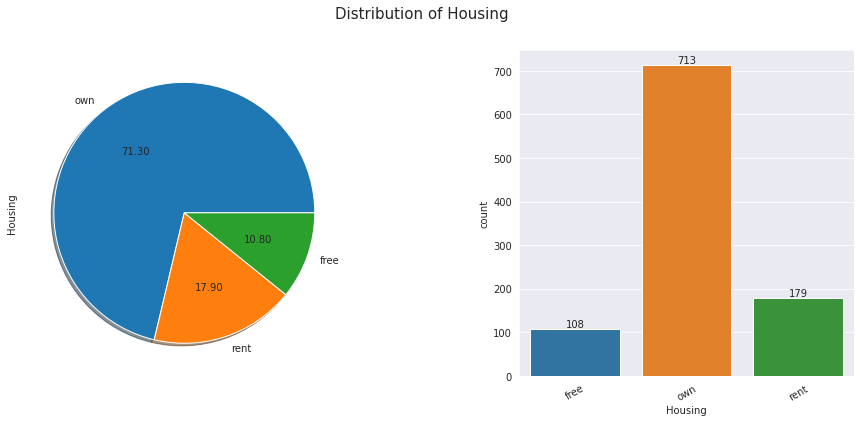

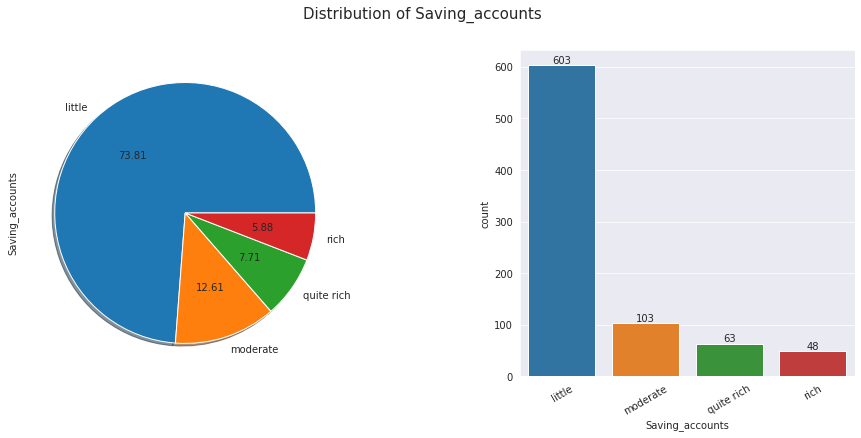

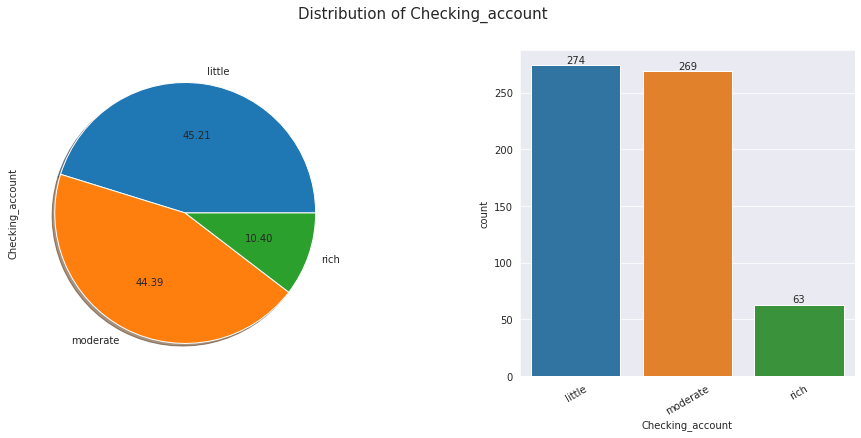

In [34]:
cat_dis(df,'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account')

**Numerical vs Categorical plots**

In [35]:
cat_col, num_col

(Index(['Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
        'Purpose'],
       dtype='object'),
 Index(['Age', 'Credit_amount', 'Duration'], dtype='object'))

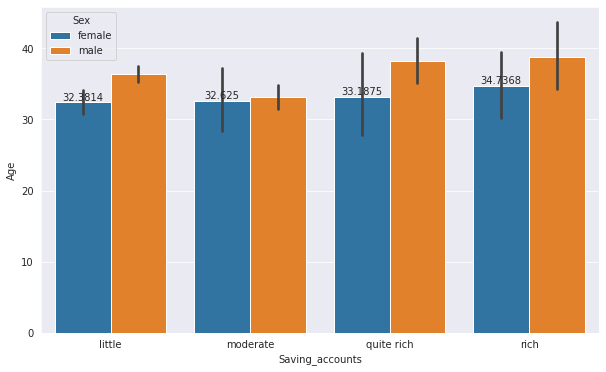

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data= df, x='Saving_accounts', y= 'Age', hue='Sex', ax=ax)
ax.bar_label(ax.containers[0])
plt.show()

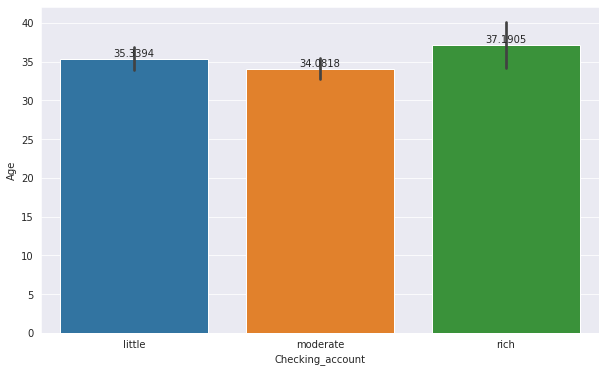

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data= df, x='Checking_account', y= 'Age')
ax.bar_label(ax.containers[0])
plt.show()

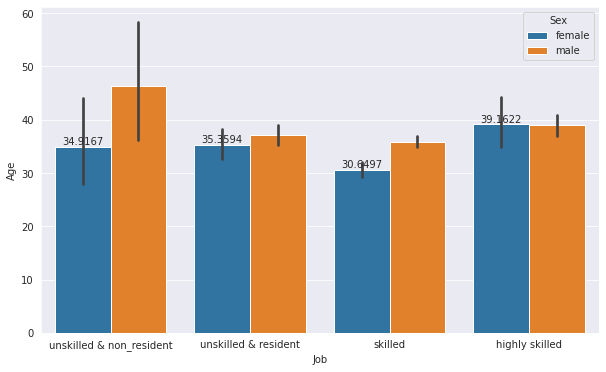

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data= df, x='Job', y= 'Age', hue='Sex')
ax.bar_label(ax.containers[0])
plt.show()

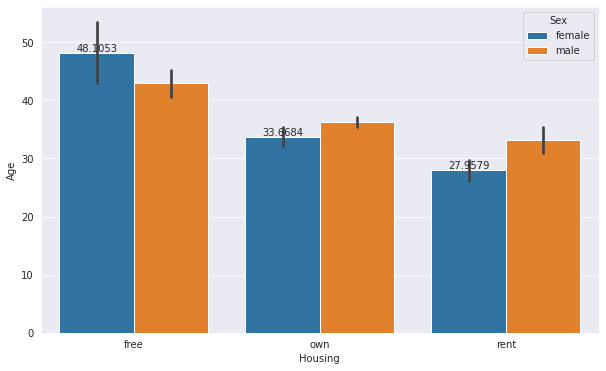

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data= df, x='Housing', y= 'Age', hue='Sex')
ax.bar_label(ax.containers[0])
plt.show()

**Numerical vs Numerical plots**

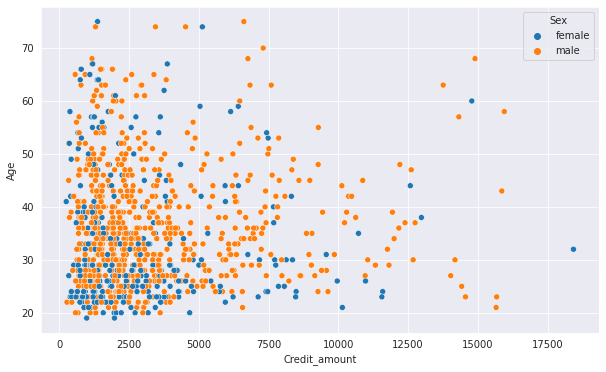

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df, x='Credit_amount', y='Age', hue = 'Sex')
plt.show()

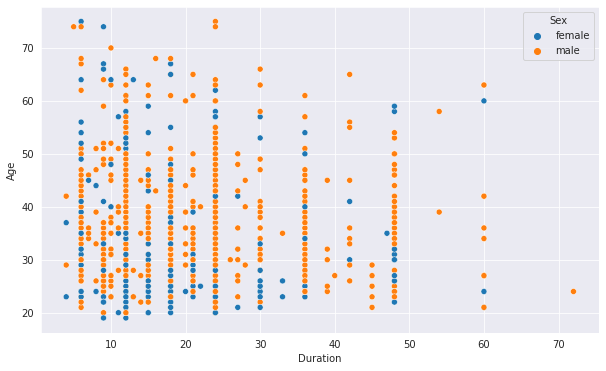

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data = df, x='Duration', y='Age', hue = 'Sex')
plt.show()

<AxesSubplot:>

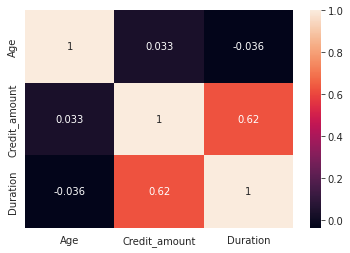

In [42]:
sns.heatmap(df.corr(), annot=True)